## **AI And Biotechnology/Bioinformatics**

## **AI and Drug Discovery Course: QSAR Modeling**
This notebook demonstrates how to collect and preprocess bioactivity data from ChEMBL for QSAR modeling

# **Part 2: Exploratory Data Analysis**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

## **Import Bioactivity Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bioactivity_preprocessed_data.csv to bioactivity_preprocessed_data.csv


In [3]:
df4 = pd.read_csv("bioactivity_preprocessed_data.csv")
df4.head(10)


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1784774,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,4600,intermediate
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,250000,inactive
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,52800,inactive
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,250000,inactive
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,15000,inactive
5,CHEMBL1784770,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,35000,inactive
6,CHEMBL1784703,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,3200,intermediate
7,CHEMBL1784775,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,30100,inactive
8,CHEMBL1784776,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,7100,intermediate
9,CHEMBL1784777,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,18400,inactive


## **Remove NA Values**

In [5]:
print("Original shape:", df4.shape)

df4 = df4.dropna(subset=[
    "molecule_chembl_id",
    "canonical_smiles",
    "standard_value"
])

# convert IC50 to numeric
df4["standard_value"] = pd.to_numeric(df4["standard_value"], errors="coerce")

df4 = df4.dropna(subset=["standard_value"])

df4 = df4[df4["bioactivity_class"] != 'intermediate']

print("After cleaning:", df4.shape)



Original shape: (16, 4)
After cleaning: (16, 4)


In [ ]:
df4.head()

## **Aggregate Duplicates IC50 (median IC50 per canonical smile)**

In [6]:
df_clean = (
    df4
    .groupby("canonical_smiles", as_index=False)
    .agg({
        "molecule_chembl_id": "first",
        "standard_value": "median",
        "bioactivity_class": "first"
    })
)

print("Before aggregation:", df4.shape[0])
print("After aggregation:", df_clean.shape[0])

df_clean.head()


Before aggregation: 16
After aggregation: 16


,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class
0,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,CHEMBL1784772,52800.0,inactive
1,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,CHEMBL1784771,250000.0,inactive
2,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784781,250000.0,inactive
3,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784770,35000.0,inactive
4,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784777,18400.0,inactive


In [ ]:
df_

In [7]:
df_clean.standard_value.describe()

,standard_value
count,16.000000
mean,91631.875000
std,103587.801033
min,310.000000
25%,14975.000000
50%,32550.000000
75%,191275.000000
max,250000.000000


## **Convert IC50 to pIC50**

Convert IC50 to the negative logarithmic scale which is essentially -log10(IC50). This conversion allows IC50 data to be more uniformly distributed.


In [8]:
df_clean["pIC50"] = -np.log10(df_clean["standard_value"] * 1e-9)

df_clean.head()


,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class,pIC50
0,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,CHEMBL1784772,52800.0,inactive,4.277366
1,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,CHEMBL1784771,250000.0,inactive,3.602060
2,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784781,250000.0,inactive,3.602060
3,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784770,35000.0,inactive,4.455932
4,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784777,18400.0,inactive,4.735182


## **Reassign Activity Labels Based on PIC50**

Based on pIC50  
Active >= 6  
Inactive < 6  

In [9]:
threshold = 6

df_clean["bioactivity_class"] = np.where(
    df_clean["pIC50"] >= threshold,
    "active",
    "inactive"
)

df_clean.head()


,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class,pIC50
0,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,CHEMBL1784772,52800.0,inactive,4.277366
1,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,CHEMBL1784771,250000.0,inactive,3.602060
2,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784781,250000.0,inactive,3.602060
3,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784770,35000.0,inactive,4.455932
4,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784777,18400.0,inactive,4.735182


## **Check Duplicates**

In [10]:
print("Duplicate SMILES remaining:",
      df_clean["canonical_smiles"].duplicated().sum())


Duplicate SMILES remaining: 0


In [11]:
df_clean.standard_value.describe()

,standard_value
count,16.000000
mean,91631.875000
std,103587.801033
min,310.000000
25%,14975.000000
50%,32550.000000
75%,191275.000000
max,250000.000000


In [12]:
df_clean.pIC50.describe()

,pIC50
count,16.000000
mean,4.503022
std,0.852166
min,3.602060
25%,3.724437
50%,4.488683
75%,4.824635
max,6.508638


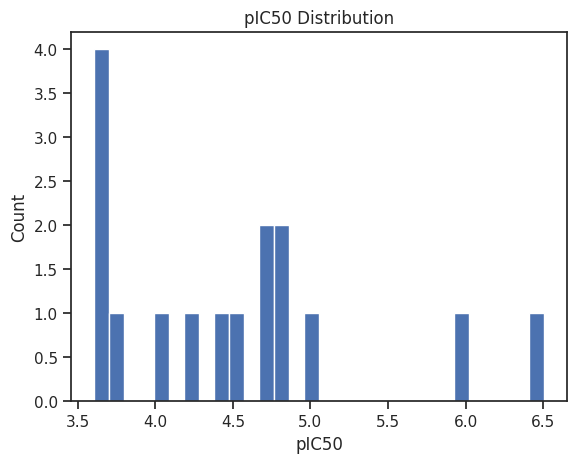

<Figure size 640x480 with 0 Axes>

In [13]:
plt.hist(df_clean["pIC50"], bins=30)
plt.xlabel("pIC50")
plt.ylabel("Count")
plt.title("pIC50 Distribution")
plt.show()
plt.savefig('histogram_pic50.pdf')

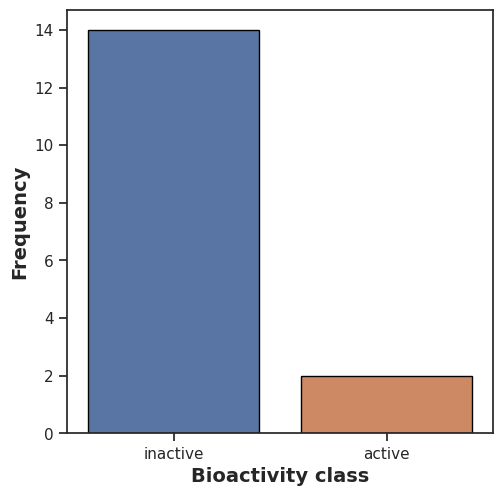

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x="bioactivity_class", data= df_clean, hue="bioactivity_class", edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('barplot_bioactivity_class.pdf')